In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import scipy.stats

import seaborn 

%matplotlib inline
import matplotlib.pyplot as plt

from exp_family import GaussianDistribution
from projectors import BoxProjector, EigenBoxProjector, CoordProjector
from optimizers import projected_gradient, admm

### Define our problem

In [2]:
np.random.seed(122)
obj = lambda x: (x ** 2).sum() <= 1
projector = CoordProjector(BoxProjector(-5, 5), EigenBoxProjector(1, 15))

### Projected gradient

In [3]:
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([2, 2]), np.eye(2)), n_iters=10 ** 5)

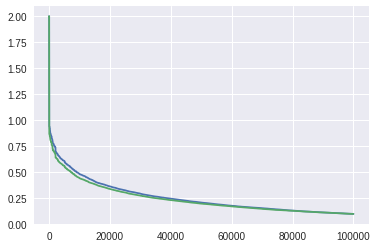

In [4]:
mu = [np.linalg.pinv(x[1]).dot(x[0]) for x in thetas]
plt.plot(mu)

In [5]:
dist = GaussianDistribution(*thetas[-1])
dist.mu, dist.cov

(array([ 0.09900447,  0.0987248 ]), array([[ 0.50300097, -0.08550597],
        [-0.08550597,  0.50944533]]))

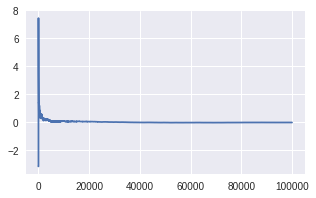

In [6]:
plt.figure(figsize=(5, 3))
plt.plot(estimations - np.pi)

In [7]:
estimations[-10:] - np.pi

array([-0.00930439, -0.009282  , -0.00931333, -0.00934465, -0.00937598,
       -0.00935197, -0.00938329, -0.00937713, -0.00937153, -0.00940285])

### ADMM

In [8]:
thetas, estimations = admm(obj, GaussianDistribution, projector, 1, 1e-6, 
                           (np.array([2, 2]), np.eye(2)), n_iters=10 ** 5)

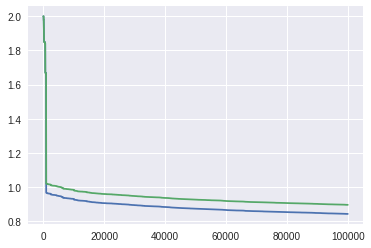

In [9]:
mu = [np.linalg.pinv(x[1]).dot(x[0]) for x in thetas]
plt.plot(mu)

In [10]:
dist = GaussianDistribution(*thetas[-1])
dist.mu, dist.cov

(array([ 0.84224399,  0.89541647]), array([[ 0.77434086, -0.15908872],
        [-0.15908872,  0.73283651]]))

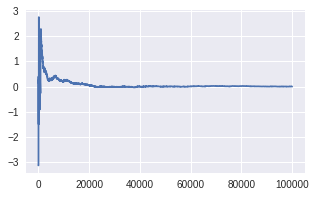

In [11]:
plt.figure(figsize=(5, 3))
plt.plot(estimations - np.pi)

In [13]:
estimations[-10:] - np.pi

array([ 0.00124463,  0.00131394,  0.00128251,  0.00146739,  0.00143596,
        0.00140453,  0.0013731 ,  0.00134167,  0.00131024,  0.00127881])